# New Jersey Institute of Technology
# DS 675: Machine Learning, Spring 2023

# Assignment 1
*   Date: 1/24/2023
*   **Due: 2/7/2023, 11:59pm EST**
*   Total possible points: 20. 

## Instructions
*   Copy it locally or edit it as a copy in your Google-Colab (File-->Save in Drive). 
*   Delivery Method: Upload a Jupyter notebook following the suggested name convention. 
*   Note: you can access the file only with your NJIT-Google-Account.  Private accounts will not have access. 
*   Submit your solution on CANVAS. Late submissions are penalized with 10% of total points per day. 

## Academic Policy
A set of ethical principles governing this course:
*   It is okay to share information and knowledge with your 
colleagues, but
*   **It is not okay** to share the code,
*   **It is not okay** to post or give out your code to others (also in the future!),
*   **It is not okay** to use code from others (also from the past) for this Assignment!

**Any noticed disregard of these principles will be sanctioned** as per the Academic Integrity Policy of NJIT (http://www5.njit.edu/policies/sites/policies/files/academic-integrity-code.pdf).

## Late Policy
Late submissions are penalized with 10% of total points per day. Max late due is 2/13/2022. 


----

<i>General instructions for this and future notebooks:</i> 
1. To run a cell and move to the next cell: Hold down <strong>Shift</strong> and press <strong>Enter</strong>
2. To run a cell and stay in the same cell: Hold down <b>Ctrl</b> and press <b>Enter</b>
3. Use the arrow up and down to navigate or do it manually as you prefer
4. Escape from typing a cell: Hit <b>Esc</b>

---------


# Assignment 1
The first assignment walks you through some elements of Python/Numpy. It is meant mostly to familiarize you with Jypyter notebooks. It also lets you to load and explore a data set. 
Write code in the cells below each task. 



-----------------------

In [16]:
import numpy as np
from numpy import array
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand
from scipy import stats
import matplotlib.pyplot as plt


-----

# Part 1: Linear Equations and Regression

---
## Task 1

Write code for solving a system of four linear equations with 4 unknowns. Solve the following problem: <br>
$x_1 + 2x_2 + 3x_3 + 5x_4 = 10$<br>
$4x_1 + 4x_2 + 5x_3 + 3x_4=4$<br>
$3x_1 + 8x_2 + 9x_3 + x_4= 3$<br>
$x_1 + x_2 + 3x_3 = 7$<br><br>

Afterwards, check results with allclose( ) function. And print out x.

<b>Expected result</b><br>x = array([-1.17857143, -3.875     ,  4.01785714,  1.375     ])


In [17]:
# your code goes here:
mat_A=np.array([[1,2,3,5],
       [4,4,5,3],
       [3,8,9,1],
       [1,1,3,0]])
mat_B=np.array([[10],
            [4],
            [3],
            [7]])
A_inv = np.linalg.inv(mat_A)
#Ax=B 
# x= DOT PRODUcT OF MATRIX A INVERSE AND B
x=np.dot(A_inv,mat_B)
#ALTERNATE WAY TO SOLVE WITHOUT INVERSE: x=np.linalg.solve(mat_A,mat_B)
print('x =',x)

x = [[-1.17857143]
 [-3.875     ]
 [ 4.01785714]
 [ 1.375     ]]


In [18]:
# check results with allclose() function
# your code goes here: 
np.allclose(np.dot(mat_A,x),mat_B)

True



---


## Task 2
Linear regression. The code below creates a random scattering of datapoints around a line. 
1. Use the normal equations to compute a line which has the best fit to all points 
in the least-squares sense. 
2. Next, plot the fitted line and the data points. 


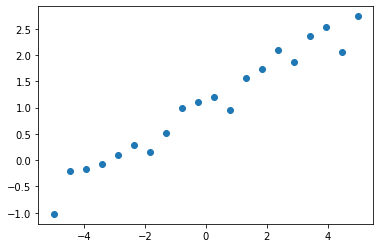

In [31]:
# generate data on a line perturbed with some noise
noise_margin= 0.76
# w[0] is random constant term (offset from origin)
# w[1] is random linear term (slope)
w = rand(2,1) 
x = np.linspace(-5,5,20)
y = w[0] + w[1]*x + noise_margin * rand(len(x))
# create the design matrix X: the x data, and add a column of ones for the constant term
X = np.column_stack( [np.ones([len(x), 1]), x.reshape(-1, 1)] )
# visualize the data
plt.scatter(x, y)
plt.show()

[1.04007534 0.33495993]


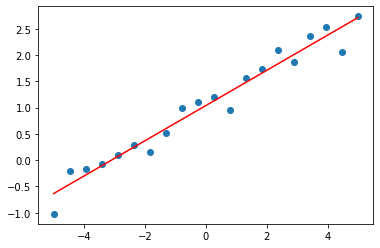

In [32]:
# X^T . X . b = X^T . y <Normal equation>
# b = (X^T . X)^-1 . X^T . y
b = inv(X.T.dot(X)).dot(X.T).dot(y) #Linear least squares
print(b)
yhat = X.dot(b) # prediction using coefficients
plt.scatter(x,y)
plt.plot(x,yhat,c='red')
plt.show()

-----


# Part 2: Exploring a Data Set


## Loading the data set

In [21]:
from sklearn.datasets import load_boston
ds = load_boston()
samples, label, feature_names = ds.data, ds.target, ds.feature_names
print(samples.shape)
print(feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [22]:
# Data description
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
# check to see if there is any null data
np.isnan(np.sum(samples))

False

In [24]:
# set print options to make things look nicer
np.set_printoptions(suppress=True, linewidth=125)

In [25]:
# find median, variance of the data and put it out in nice looking format
median = np.round(np.median(samples, axis=0), decimals=1)
variance = np.round(np.var(samples, axis=0), decimals=1)
basic_stats = np.vstack((median, variance))
basic_stats_label = ['  median','variance']
print('\t\tCRIM\tZN\tINDUS\tCHAS\tNOX\tRM\tAGE\tDIS\tRAD\tTAX\tPTRATIO\tB\tLSTAT')
for basic_stats_label, row in zip(basic_stats_label, basic_stats):
    print('{} [\t{}]'.format(basic_stats_label,"".join('%s\t'%i for i in row)))

		CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
  median [	0.3	0.0	9.7	0.0	0.5	6.2	77.5	3.2	5.0	330.0	19.0	391.4	11.4	]
variance [	73.8	542.9	47.0	0.1	0.0	0.5	790.8	4.4	75.7	28348.6	4.7	8318.3	50.9	]


---
## Task 3
1. Use function <code>stats.describe</code> to retrieve the `max` `min` and `average` of samples then display it as in the expected output similar to the output for `median` and `variance` above). 
<br><br>


In [26]:
# your code goes here:
max = np.round(np.max(samples, axis=0), decimals=1)
min = np.round(np.min(samples, axis=0), decimals=1)
average=np.round(np.average(samples,axis=0), decimals=1)
Stats = np.vstack((max, min, average))
Stats_label = ['max','min', 'avg']
print('\tCRIM\tZN\tINDUS\tCHAS\tNOX\tRM\tAGE\tDIS\tRAD\tTAX\tPTRATIO\tB\tLSTAT')
for Stats_label, row in zip(Stats_label, Stats):
    print('{}[\t{}]'.format(Stats_label,"".join('%s\t'%i for i in row)))

	CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
max[	89.0	100.0	27.7	1.0	0.9	8.8	100.0	12.1	24.0	711.0	22.0	396.9	38.0	]
min[	0.0	0.0	0.5	0.0	0.4	3.6	2.9	1.1	1.0	187.0	12.6	0.3	1.7	]
avg[	3.6	11.4	11.1	0.1	0.6	6.3	68.6	3.8	9.5	408.2	18.5	356.7	12.7	]


import matplotlib.pyplot as plt

# let plot out to see what is the distribution of Owner occupied units based on the data
n, bins, patches = plt.hist(samples[:,6],bins='auto')
plt.title(' Proportion of owner-occupied units built prior to 1940')
plt.show()
print('Bin sizes: {}'.format(n))




---


## Task 4

Plot out the histogram of another feature of the dataset that you are interested in, give the plot a title and also print out the bin sizes 



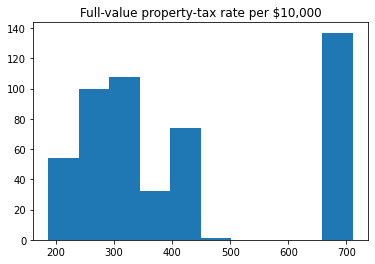

Bin sizes: [ 54. 100. 108.  32.  74.   1.   0.   0.   0. 137.]


In [27]:
# TAX
n, bins, patches = plt.hist(samples[:,9],bins='auto')
plt.title('Full-value property-tax rate per $10,000')
plt.show()
print('Bin sizes: {}'.format(n))

---
## Task 5



Write a function that: 
* takes as input a given dataset and two numbers $a$ and $b$. 
* returns the ids of houses that tax is either less than $a$ or more than $b$. 

Demonstrate how the function runs with two specific inputs $a$ and $b$ of your choice. 




In [28]:
def house_with_defined_age(dataset,age):
    '''This function will return indices of all house with proportion of owner-occupied units built prior to 1940 greater than age%'''
    ids = []
    for id, record in enumerate(dataset):
        if record[6]>age:
            ids.append(id)
    return ids

# list out all records with unites built prior to 1940 greater than 50%
samples[house_with_defined_age(samples,50)]

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,   4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,   9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,   4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,   5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,   6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,   7.88   ]])

In [29]:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# your code goes here
def house_with_tax_limit(dataset,tax1, tax2):
    '''This function will return indices of all houses with tax>100 and tax<500 %'''
    ids = []
    for id, record in enumerate(dataset):
        if record[9]>tax1 and record[9]<tax2:
            ids.append(id)
    return ids
samples[house_with_tax_limit(samples,50,500)]

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,   4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,   9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,   4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,   5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,   6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,   7.88   ]])